In [75]:
#%pip install hdbscan
import hdbscan
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch, MeanShift, AffinityPropagation, SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psutil
import time

[0 0 0 ... 0 0 0]
[   0    1    2 ... 9997 9998 9999]
[[-1.04430387  0.18624911]
 [ 1.75463781  0.08909565]
 [ 0.44119748  0.81050707]
 ...
 [ 1.70572911 -0.07472037]
 [ 1.89191517  0.12411725]
 [ 0.87008923 -0.48837905]]


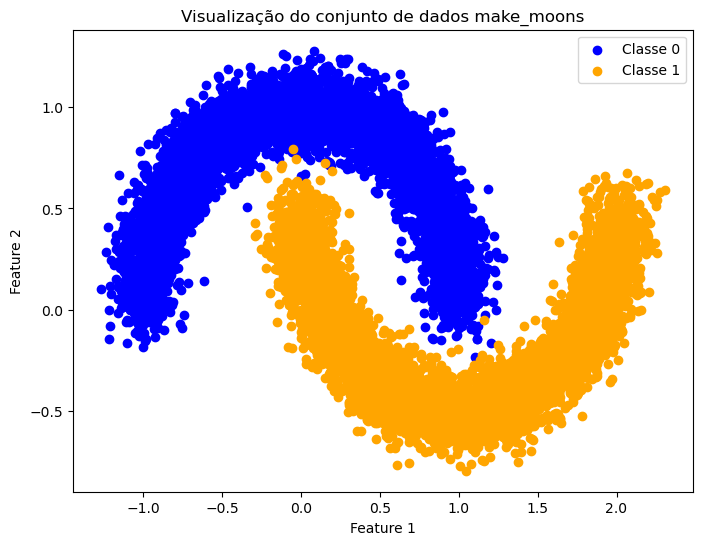

In [76]:
X, y = make_moons(n_samples=10000, noise=0.1)
dbscan = DBSCAN(eps=0.1, min_samples=5)
dbscan.fit(X)
print(dbscan.labels_)
print(dbscan.core_sample_indices_)
print(dbscan.components_)
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Classe 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='orange', label='Classe 1')
plt.title('Visualização do conjunto de dados make_moons')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [77]:
X_new = np.array([[-1, 0], [2, 0.5], [0, -0.1], [3, 1]])


In [78]:
knn_euclidean = KNeighborsClassifier(n_neighbors=30, weights='distance', metric='euclidean')
knn_minkowski = KNeighborsClassifier(n_neighbors=30, weights='distance', metric='minkowski', p=3)
knn_manhattan = KNeighborsClassifier(n_neighbors=30, weights='distance', metric='manhattan')
knn_chebyshev = KNeighborsClassifier(n_neighbors=30, weights='distance', metric='chebyshev')


In [79]:
knn_euclidean.fit(X[dbscan.core_sample_indices_], dbscan.labels_[dbscan.core_sample_indices_])
knn_minkowski.fit(X[dbscan.core_sample_indices_], dbscan.labels_[dbscan.core_sample_indices_])
knn_manhattan.fit(X[dbscan.core_sample_indices_], dbscan.labels_[dbscan.core_sample_indices_])
knn_chebyshev.fit(X[dbscan.core_sample_indices_], dbscan.labels_[dbscan.core_sample_indices_])


KNeighborsClassifier(metric='chebyshev', n_neighbors=30, weights='distance')

In [80]:
y_pred_euclidean = knn_euclidean.predict(X_new)
y_pred_minkowski = knn_minkowski.predict(X_new)
y_pred_manhattan = knn_manhattan.predict(X_new)
y_pred_chebyshev = knn_chebyshev.predict(X_new)


In [81]:
y_prob_euclidean = knn_euclidean.predict_proba(X_new)
y_prob_minkowski = knn_minkowski.predict_proba(X_new)
y_prob_manhattan = knn_manhattan.predict_proba(X_new)
y_prob_chebyshev = knn_chebyshev.predict_proba(X_new)


In [82]:
y_dist_euclidean, y_pred_idx_euclidean = knn_euclidean.kneighbors(X_new, n_neighbors=1)
y_dist_minkowski, y_pred_idx_minkowski = knn_minkowski.kneighbors(X_new, n_neighbors=1)
y_dist_manhattan, y_pred_idx_manhattan = knn_manhattan.kneighbors(X_new, n_neighbors=1)
y_dist_chebyshev, y_pred_idx_chebyshev = knn_chebyshev.kneighbors(X_new, n_neighbors=1)


In [83]:
print("Predictions (Euclidean):", y_pred_euclidean)
print("Prediction probabilities (Euclidean):\n", y_prob_euclidean)

print("Predictions (Minkowski):", y_pred_minkowski)
print("Prediction probabilities (Minkowski):\n", y_prob_minkowski)

print("Predictions (Manhattan):", y_pred_manhattan)
print("Prediction probabilities (Manhattan):\n", y_prob_manhattan)

print("Predictions (Chebyshev):", y_pred_chebyshev)
print("Prediction probabilities (Chebyshev):\n", y_prob_chebyshev)

print("Distances (Euclidean):\n", y_dist_euclidean)
print("Indices (Euclidean):\n", y_pred_idx_euclidean)

print("Distances (Minkowski):\n", y_dist_minkowski)
print("Indices (Minkowski):\n", y_pred_idx_minkowski)

print("Distances (Manhattan):\n", y_dist_manhattan)
print("Indices (Manhattan):\n", y_pred_idx_manhattan)

print("Distances (Chebyshev):\n", y_dist_chebyshev)
print("Indices (Chebyshev):\n", y_pred_idx_chebyshev)

Predictions (Euclidean): [0 0 0 0]
Prediction probabilities (Euclidean):
 [[1.]
 [1.]
 [1.]
 [1.]]
Predictions (Minkowski): [0 0 0 0]
Prediction probabilities (Minkowski):
 [[1.]
 [1.]
 [1.]
 [1.]]
Predictions (Manhattan): [0 0 0 0]
Prediction probabilities (Manhattan):
 [[1.]
 [1.]
 [1.]
 [1.]]
Predictions (Chebyshev): [0 0 0 0]
Prediction probabilities (Chebyshev):
 [[1.]
 [1.]
 [1.]
 [1.]]
Distances (Euclidean):
 [[0.0112136 ]
 [0.00581023]
 [0.00972871]
 [0.80661598]]
Indices (Euclidean):
 [[7576]
 [ 991]
 [3163]
 [ 362]]
Distances (Minkowski):
 [[0.0110833 ]
 [0.0051957 ]
 [0.00956184]
 [0.73903988]]
Indices (Minkowski):
 [[7491]
 [ 991]
 [3163]
 [ 362]]
Distances (Manhattan):
 [[0.01157222]
 [0.00607385]
 [0.01117833]
 [1.10517884]]
Indices (Manhattan):
 [[7576]
 [6598]
 [9431]
 [ 362]]
Distances (Chebyshev):
 [[0.01040282]
 [0.00445007]
 [0.00953561]
 [0.69386788]]
Indices (Chebyshev):
 [[7491]
 [ 991]
 [3163]
 [ 362]]


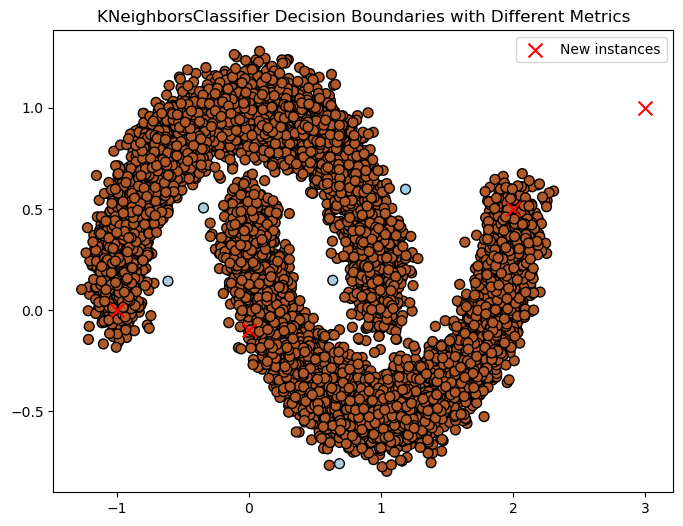

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap=plt.cm.Paired, edgecolors='k', s=50)
plt.scatter(X_new[:, 0], X_new[:, 1], c='red', marker='x', s=100, label='New instances')
plt.title("KNeighborsClassifier Decision Boundaries with Different Metrics")
plt.legend()
plt.show()

In [85]:
hdb = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=20)
hdb_labels = hdb.fit_predict(X)

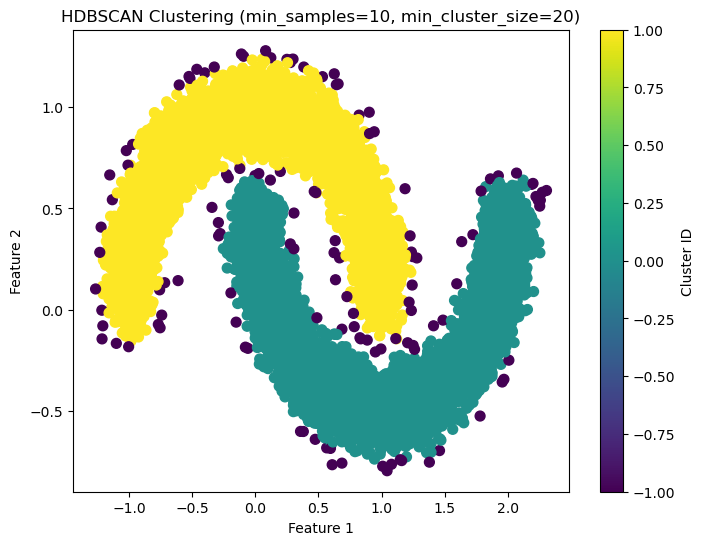

Cluster labels: [-1  0  1]
Number of clusters: 3


In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=hdb_labels, cmap='viridis', s=50)
plt.title("HDBSCAN Clustering (min_samples=10, min_cluster_size=20)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster ID")
plt.show()

print("Cluster labels:", np.unique(hdb_labels))
print("Number of clusters:", len(np.unique(hdb_labels)))

In [87]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values


In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
def plot_3d(X, labels, title="Clustering Results"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50)
    ax.set_title(title)
    ax.set_xlabel('Feature 1 (Age)')
    ax.set_ylabel('Feature 2 (Income)')
    ax.set_zlabel('Feature 3 (Spending Score)')
    plt.colorbar(scatter)
    plt.show()

C:\Users\marce\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


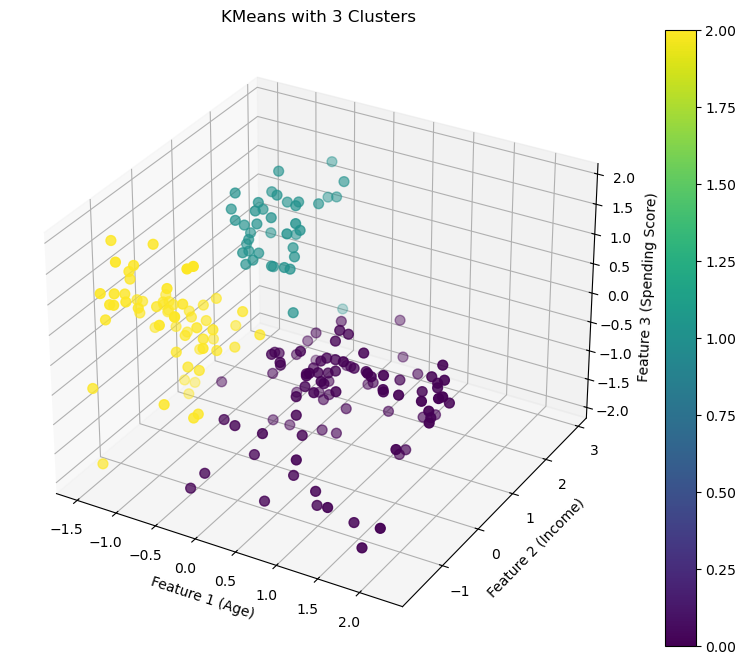

KMeans with 3 clusters - Silhouette Score: 0.3579


C:\Users\marce\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


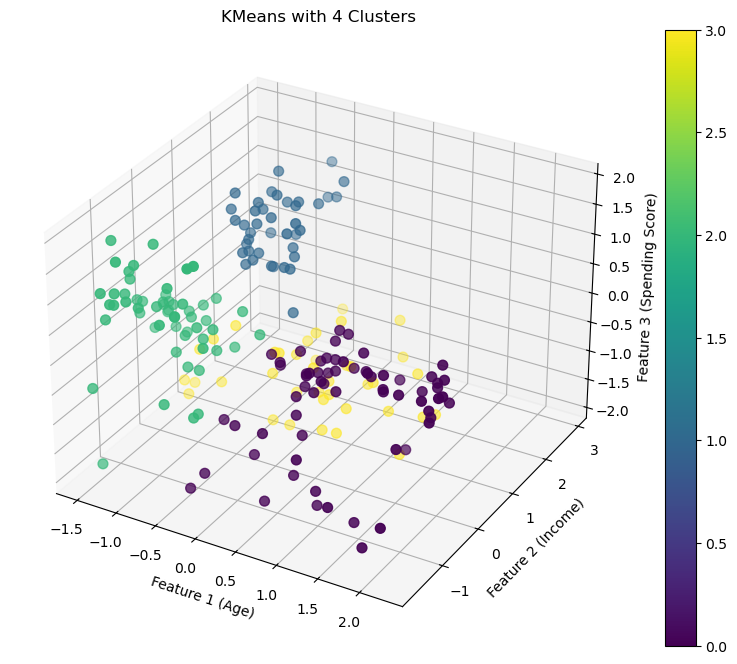

KMeans with 4 clusters - Silhouette Score: 0.4040


C:\Users\marce\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


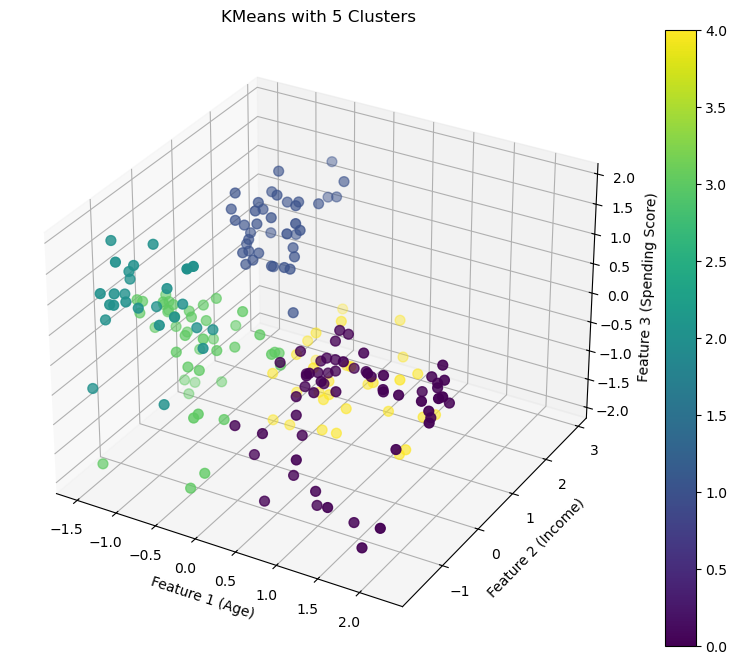

KMeans with 5 clusters - Silhouette Score: 0.4085


In [89]:
k_values = [3, 4, 5]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels_kmeans = kmeans.labels_
    
    plot_3d(X_scaled, labels_kmeans, f"KMeans with {k} Clusters")
    
   
    score = silhouette_score(X_scaled, labels_kmeans)
    print(f"KMeans with {k} clusters - Silhouette Score: {score:.4f}")


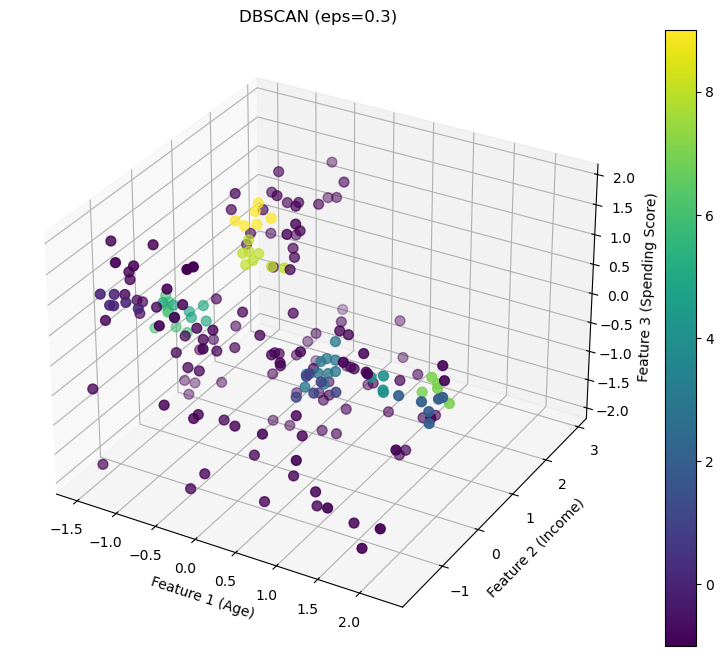

DBSCAN (eps=0.3) - Silhouette Score: -0.1822


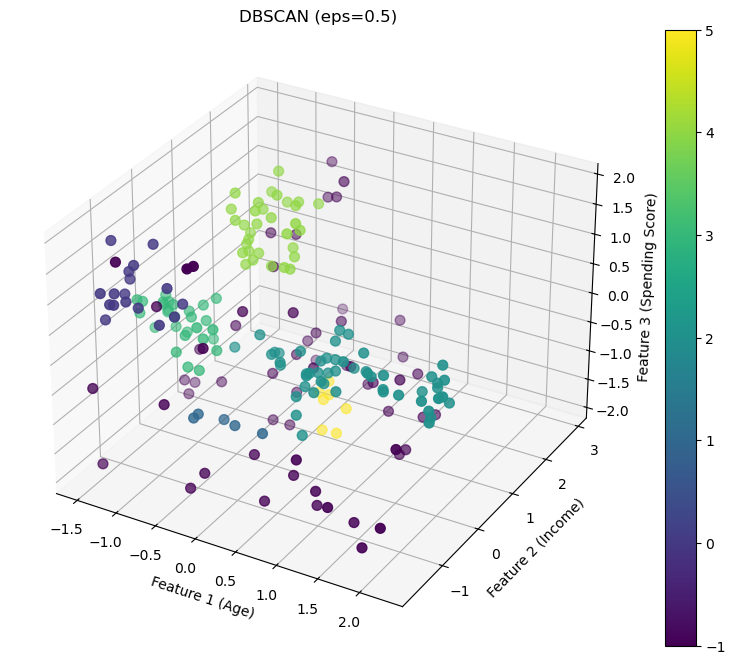

DBSCAN (eps=0.5) - Silhouette Score: 0.1845


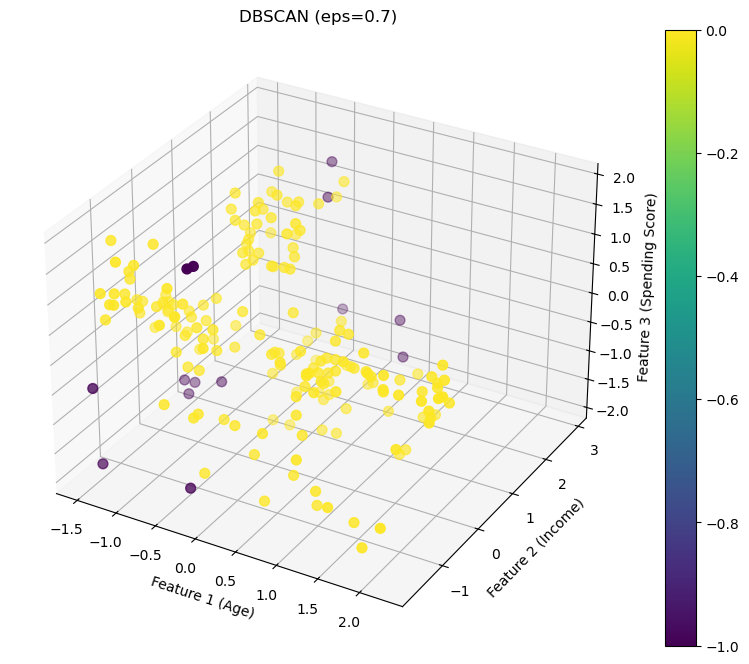

DBSCAN (eps=0.7) - Silhouette Score: 0.2429


In [90]:
eps_values = [0.3, 0.5, 0.7]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5, metric='euclidean')
    labels_dbscan = dbscan.fit_predict(X_scaled)
    
    plot_3d(X_scaled, labels_dbscan, f"DBSCAN (eps={eps})")
    
    
    score = silhouette_score(X_scaled, labels_dbscan)
    print(f"DBSCAN (eps={eps}) - Silhouette Score: {score:.4f}")


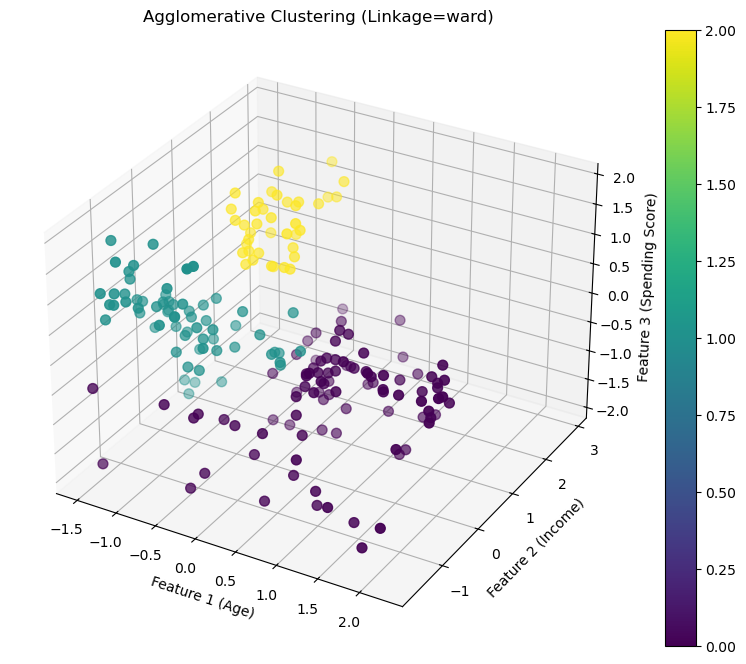

Agglomerative Clustering (Linkage=ward) - Silhouette Score: 0.3215


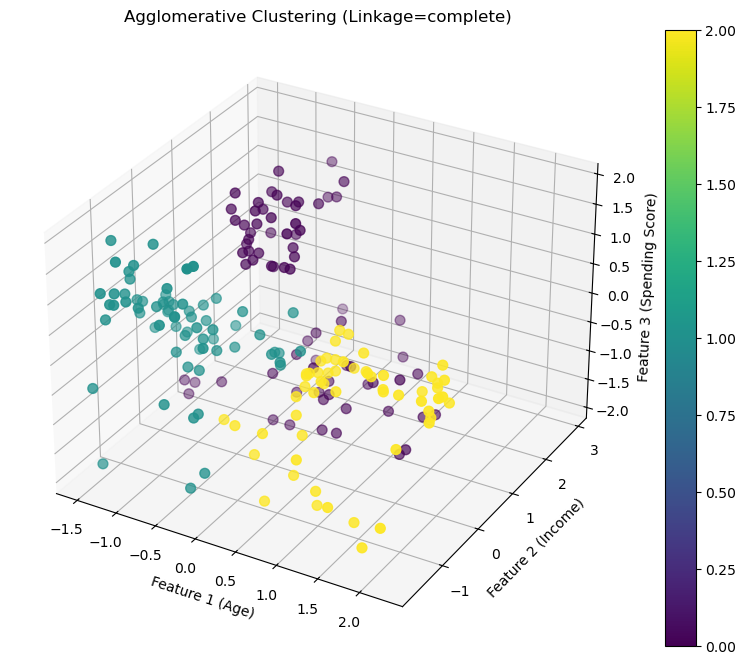

Agglomerative Clustering (Linkage=complete) - Silhouette Score: 0.2838


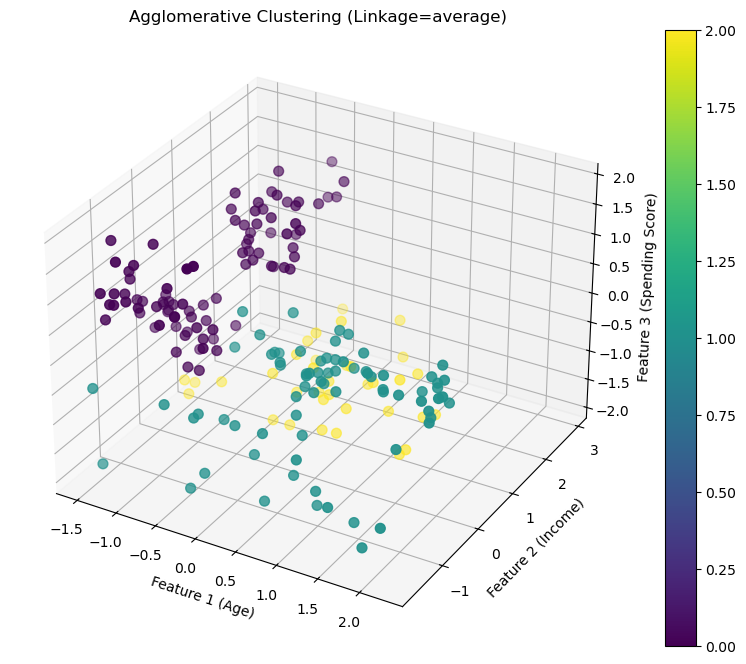

Agglomerative Clustering (Linkage=average) - Silhouette Score: 0.3400


In [91]:
linkage_values = ['ward', 'complete', 'average']
for linkage in linkage_values:
    agg_clust = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    labels_agg = agg_clust.fit_predict(X_scaled)
    
    plot_3d(X_scaled, labels_agg, f"Agglomerative Clustering (Linkage={linkage})")
    
    
    score = silhouette_score(X_scaled, labels_agg)
    print(f"Agglomerative Clustering (Linkage={linkage}) - Silhouette Score: {score:.4f}")


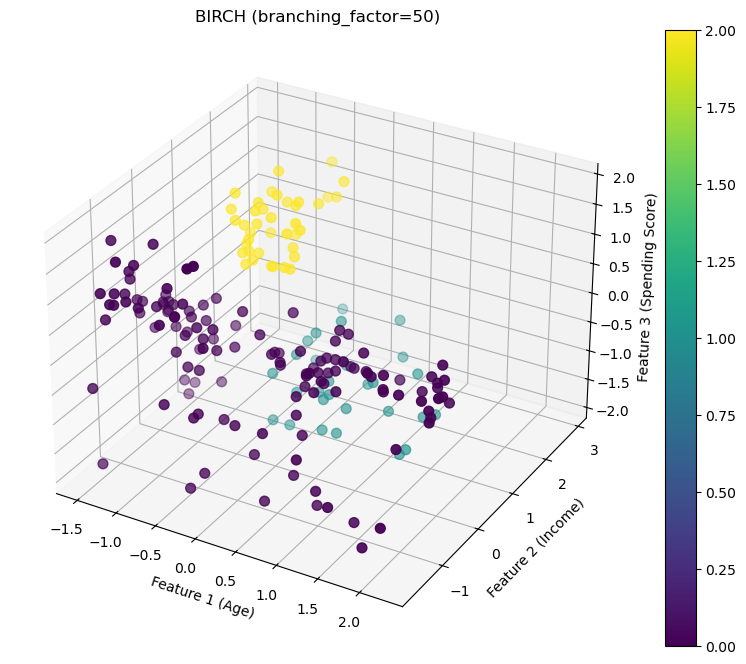

BIRCH (branching_factor=50) - Silhouette Score: 0.2657


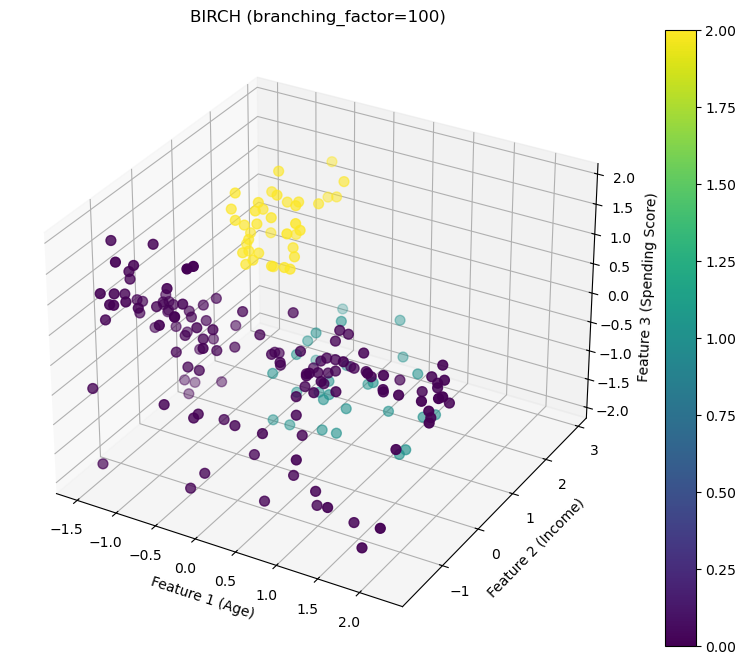

BIRCH (branching_factor=100) - Silhouette Score: 0.2657


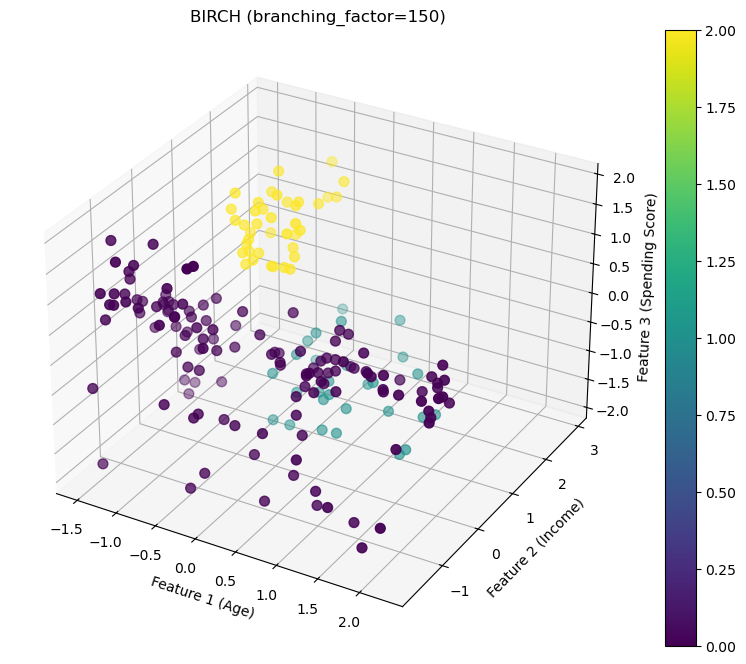

BIRCH (branching_factor=150) - Silhouette Score: 0.2657


In [92]:
branching_values = [50, 100, 150]
for b in branching_values:
    birch = Birch(n_clusters=3, branching_factor=b)
    labels_birch = birch.fit_predict(X_scaled)
    
    plot_3d(X_scaled, labels_birch, f"BIRCH (branching_factor={b})")
    

    score = silhouette_score(X_scaled, labels_birch)
    print(f"BIRCH (branching_factor={b}) - Silhouette Score: {score:.4f}")


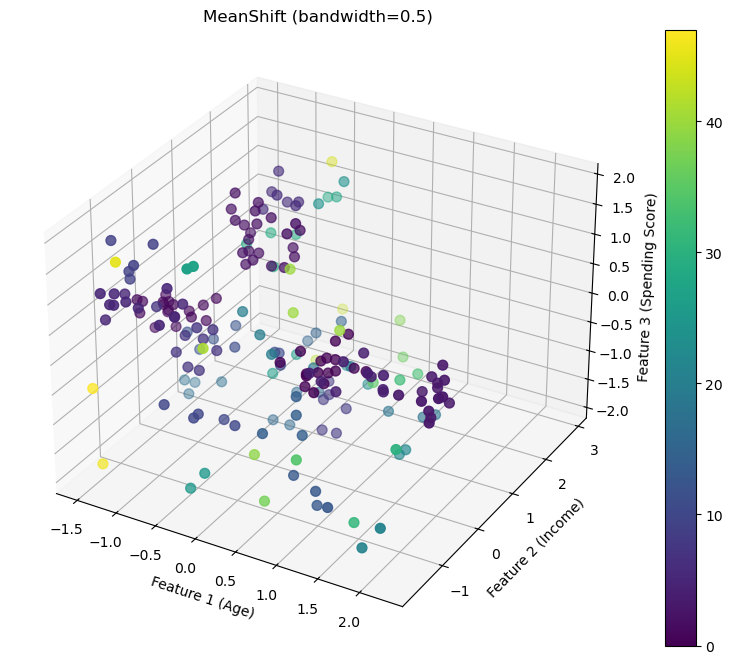

MeanShift (bandwidth=0.5) - Silhouette Score: 0.2565


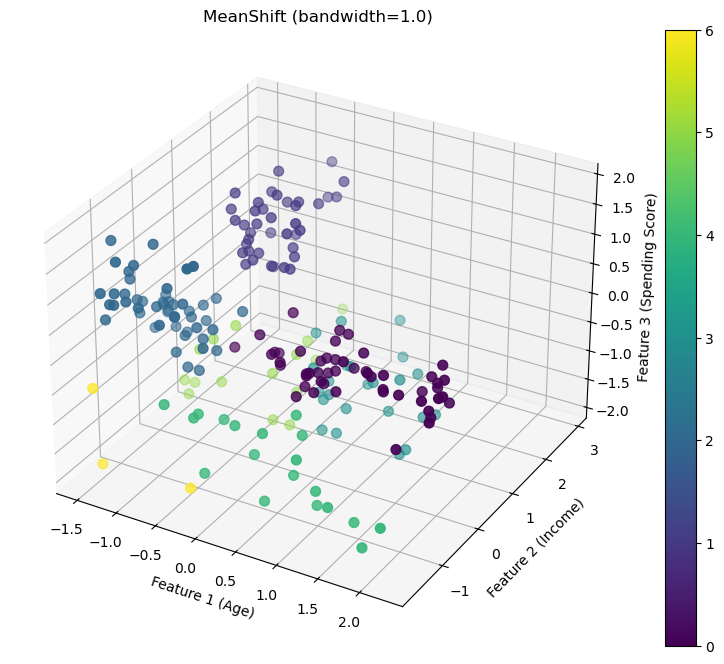

MeanShift (bandwidth=1.0) - Silhouette Score: 0.3810
MeanShift (bandwidth=1.5) - Only 1 cluster formed. Skipping silhouette score.


In [94]:
bandwidth_values = [0.5, 1.0, 1.5]
for bandwidth in bandwidth_values:
    mean_shift = MeanShift(bandwidth=bandwidth)
    labels_mean_shift = mean_shift.fit_predict(X_scaled)
    
    n_clusters = len(np.unique(labels_mean_shift))
    if n_clusters > 1:
        plot_3d(X_scaled, labels_mean_shift, f"MeanShift (bandwidth={bandwidth})")
        score = silhouette_score(X_scaled, labels_mean_shift)
        print(f"MeanShift (bandwidth={bandwidth}) - Silhouette Score: {score:.4f}")
    else:
        print(f"MeanShift (bandwidth={bandwidth}) - Only 1 cluster formed. Skipping silhouette score.")


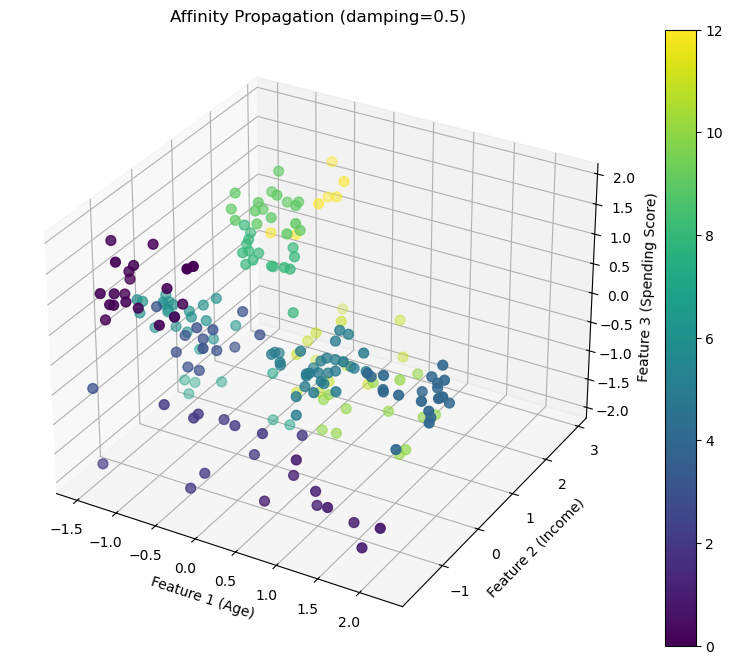

Affinity Propagation (damping=0.5) - Silhouette Score: 0.3691


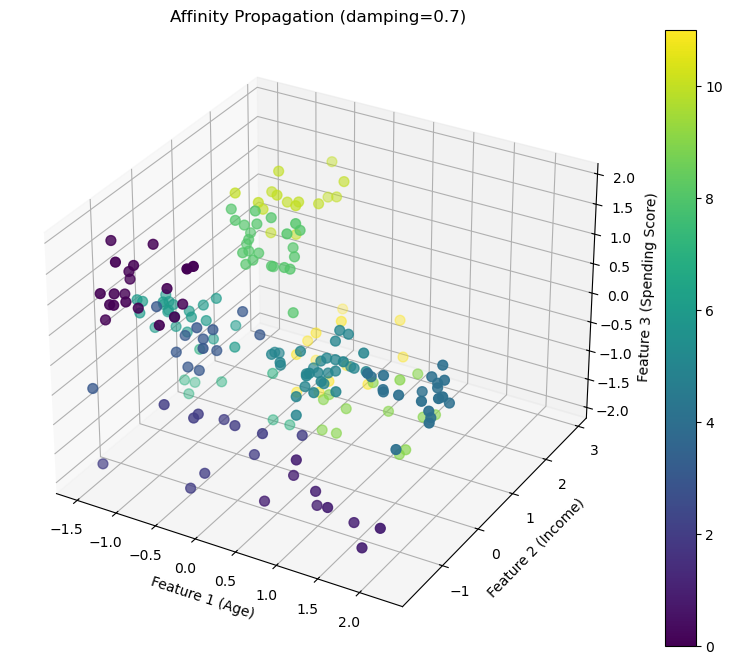

Affinity Propagation (damping=0.7) - Silhouette Score: 0.3667


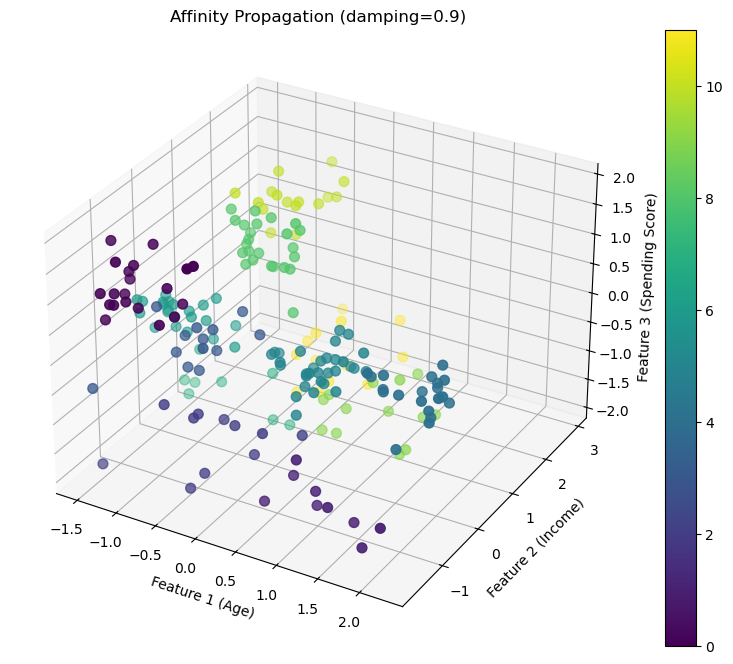

Affinity Propagation (damping=0.9) - Silhouette Score: 0.3667


In [95]:
damping_values = [0.5, 0.7, 0.9]
for damping in damping_values:
    affinity_prop = AffinityPropagation(damping=damping)
    labels_affinity_prop = affinity_prop.fit_predict(X_scaled)
    
    plot_3d(X_scaled, labels_affinity_prop, f"Affinity Propagation (damping={damping})")
    

    score = silhouette_score(X_scaled, labels_affinity_prop)
    print(f"Affinity Propagation (damping={damping}) - Silhouette Score: {score:.4f}")


C:\Users\marce\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


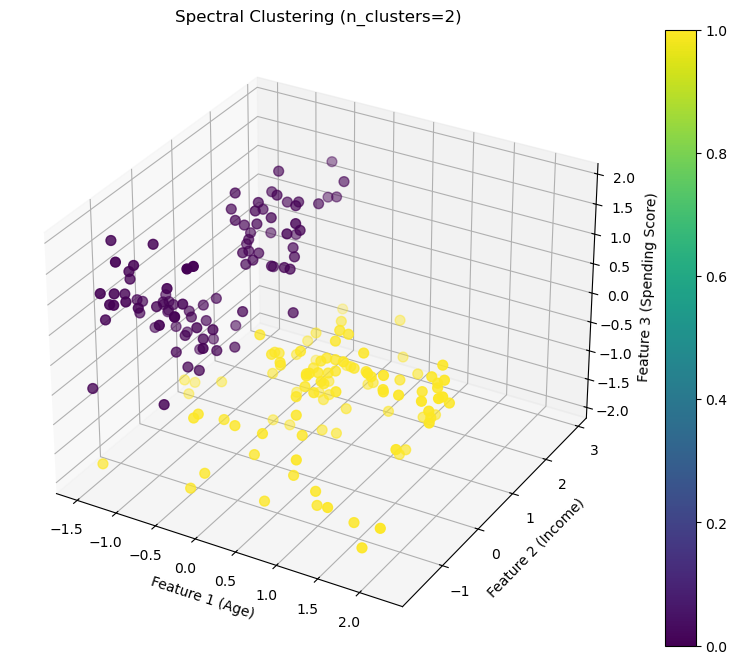

Spectral Clustering (n_clusters=2) - Silhouette Score: 0.3342


C:\Users\marce\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


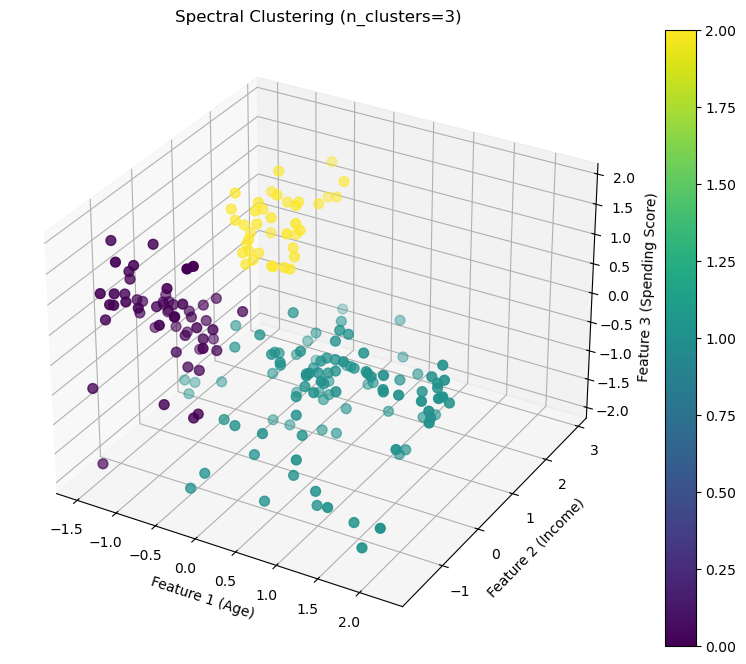

Spectral Clustering (n_clusters=3) - Silhouette Score: 0.3531


C:\Users\marce\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


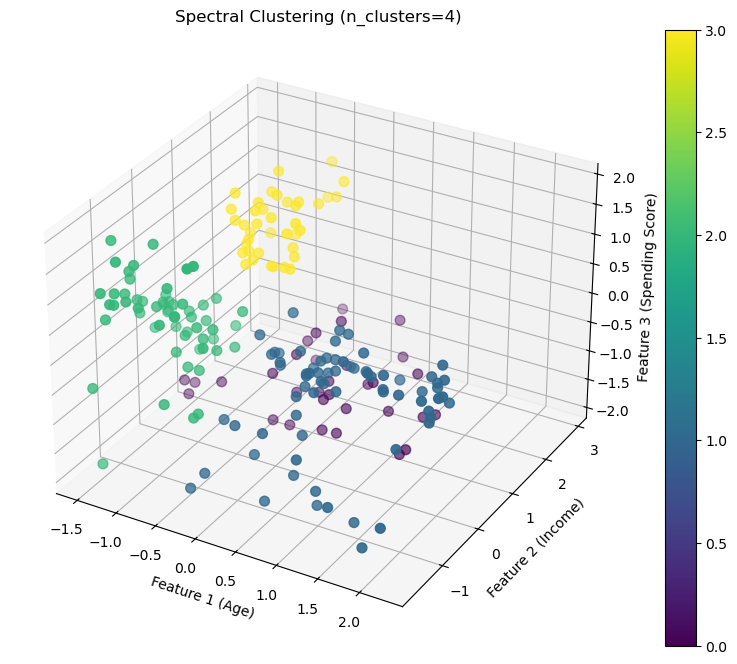

Spectral Clustering (n_clusters=4) - Silhouette Score: 0.4030


In [96]:
spectral_k_values = [2, 3, 4]
for k in spectral_k_values:
    spectral = SpectralClustering(n_clusters=k)
    labels_spectral = spectral.fit_predict(X_scaled)
    
    plot_3d(X_scaled, labels_spectral, f"Spectral Clustering (n_clusters={k})")
    
    
    score = silhouette_score(X_scaled, labels_spectral)
    print(f"Spectral Clustering (n_clusters={k}) - Silhouette Score: {score:.4f}")